# Image Processing Module 7: Labeling and Quantifying Shape Feature Information

### Purpose: To move from thresholding to segmentation and shape feature quantification

Created by: Hawley Helmbrecht

Creation Date: 08/20/2020

Last Update: 

*Step 1: Import Necessary Packages*

In [17]:
import numpy as np
import pandas as pd
from scipy import ndimage

import skimage.filters
from skimage import morphology
from skimage.measure import label, regionprops
from skimage.color import label2rgb

import matplotlib.pyplot as plt

*Step 2: User Inputs*

In [3]:
#replace the example path from my computer with the path to the image on your computer

cell_im_location = '/Users/hhelmbre/Desktop/packages/textile/example_data/ogd_cells.tif'

Note: The cell image being read in is from the OGD Severity study by Rick Liao, Andrea Joseph, Mengying Zhang, Mike McKenna, Jeremy Filteau, and Hawley Helmbrecht within the Nance lab. It is an image taken from the thalamus with a costain DAPI/PI/Iba

*Step 3: Reading in the Image*

In [4]:
cell_im = io.imread(cell_im_location)

*Step 4: Viewing the Image*

In [ ]:
plt.imshow(cell_im)

*Step 5: Splitting Channels for Thresholding*

In [10]:
red_cell_im = cell_im[:,:, 0]
green_cell_im = cell_im[:,:,1]
blue_cell_im = cell_im[:,:,2]

*Step 6: Applying the Otsu Threshold*

In [11]:
thresh_otsu = skimage.filters.threshold_otsu(green_cell_im)
binary_otsu = green_cell_im > thresh_otsu

*Step 7: Checking our Threshold*

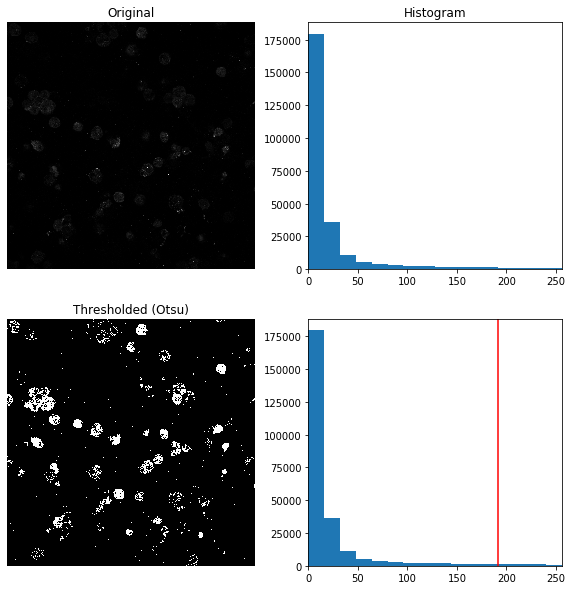

In [14]:
fig, ax = plt.subplots(2, 2, figsize=(10, 10))

ax[0, 0].imshow(green_cell_im, cmap=plt.cm.gray)
ax[0, 0].set_title('Original')

ax[0, 1].hist(green_cell_im.ravel(), bins=256)
ax[0, 1].set_title('Histogram')
ax[0, 1].set_xlim((0, 256)) 

ax[1, 0].imshow(binary_otsu, cmap=plt.cm.gray)
ax[1, 0].set_title('Thresholded (Otsu)')

ax[1, 1].hist(green_cell_im.ravel(), bins=256)
ax[1, 1].axvline(thresh_otsu, color='r')
ax[1, 1].set_xlim((0, 256)) 

for a in ax[:, 0]:
    a.axis('off')
plt.show()

*Step 8: Removing Small Objects from the Threshold (Otsu) Image*

In [15]:
new_binary_otsu = morphology.remove_small_objects(binary_otsu, min_size=64)

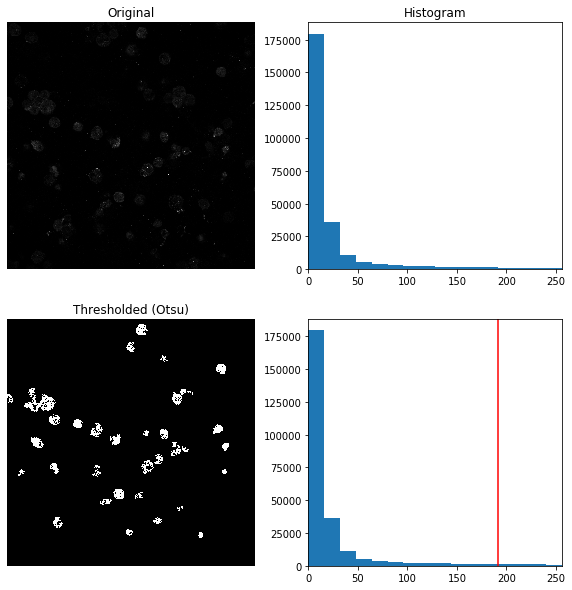

In [16]:
fig, ax = plt.subplots(2, 2, figsize=(10, 10))

ax[0, 0].imshow(green_cell_im, cmap=plt.cm.gray)
ax[0, 0].set_title('Original')

ax[0, 1].hist(green_cell_im.ravel(), bins=256)
ax[0, 1].set_title('Histogram')
ax[0, 1].set_xlim((0, 256)) 

ax[1, 0].imshow(new_binary_otsu, cmap=plt.cm.gray)
ax[1, 0].set_title('Thresholded (Otsu)')

ax[1, 1].hist(green_cell_im.ravel(), bins=256)
ax[1, 1].axvline(thresh_otsu, color='r')
ax[1, 1].set_xlim((0, 256)) 

for a in ax[:, 0]:
    a.axis('off')
plt.show()

*Step 9: Labeling the Image*

In [18]:
label_image = label(new_binary_otsu)
image_label_overlay = label2rgb(label_image, image=new_binary_otsu, bg_label=0)

In [ ]:

new_binary_otsu = ndimage.binary_fill_holes(new_binary_otsu)

In [ ]:
new_binary_otsu = binary_otsu.astype(int)